In [16]:
import matplotlib.pyplot as plt
import pandas as pd
from wordcloud import WordCloud
from indicnlp.tokenize import indic_tokenize
from collections import Counter

train_file = f"Hindi_train.csv"
test_file = f"Hindi_test.csv"

train_df = pd.read_csv(train_file)
test_df = pd.read_csv(test_file)

# Concatenate the train and test dataframe and extract all the hindi text data for word cloud
df = pd.concat([train_df, test_df])

# Remove the rows with missing values and drop the duplicates
df.dropna(inplace=True)
df.drop_duplicates(inplace=True)

# Separate the text data based on hate and non-hate labels
hate_text = ' '.join(df[df['Labels Set'] == 1]['Processed_Post'])
non_hate_text = ' '.join(df[df['Labels Set'] == 0]['Processed_Post'])

# Tokenize the text using Indic NLP
hate_tokens = indic_tokenize.trivial_tokenize(hate_text)
non_hate_tokens = indic_tokenize.trivial_tokenize(non_hate_text)

# Count the frequency of each token
hate_word_freq = Counter(hate_tokens)
non_hate_word_freq = Counter(non_hate_tokens)

# Filter out common words that appear in both hate and non-hate text
common_words = set(hate_word_freq.keys()) & set(non_hate_word_freq.keys())

# Remove common words from the frequency counts
for word in common_words:
    del hate_word_freq[word]
    del non_hate_word_freq[word]

In [17]:
# Specify the font path or name here
font_path = 'NotoSansDevanagari-VariableFont_wdth,wght.ttf'

In [18]:
# Generate word clouds for hate and non-hate labels
hate_wordcloud = WordCloud(width=800, height=800, background_color='black', stopwords=None,
                           font_path=font_path, min_font_size=10).generate_from_frequencies(hate_word_freq)

non_hate_wordcloud = WordCloud(width=800, height=800, background_color='white', stopwords=None,
                               font_path=font_path, min_font_size=10).generate_from_frequencies(non_hate_word_freq)

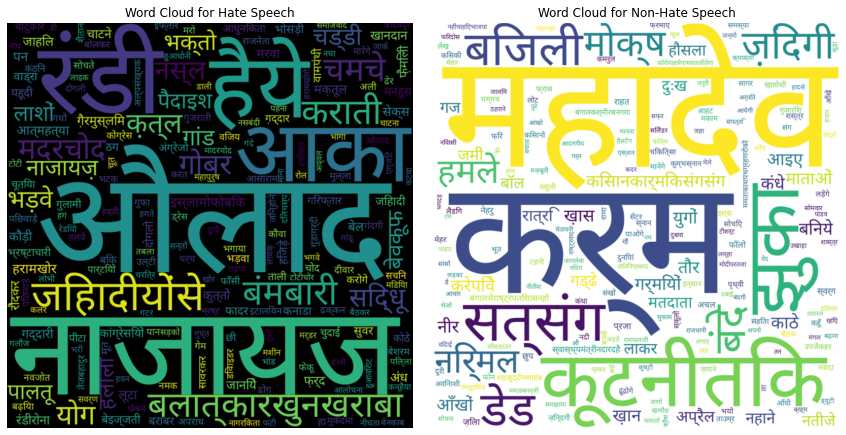

In [19]:
# Plot the word clouds
plt.figure(figsize=(12, 6), facecolor=None)
plt.subplot(1, 2, 1)
plt.imshow(hate_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Hate Speech')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(non_hate_wordcloud, interpolation='bilinear')
plt.title('Word Cloud for Non-Hate Speech')
plt.axis('off')

plt.tight_layout()
plt.show()